In [21]:
import sys
sys.path.insert(0, 'C:/Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data')
import data__, main_, datafactory
from importlib import reload
reload(data__)
reload(main_)
reload(datafactory)
from datafactory import DataSet
from data__ import Transform
from main_ import Model
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

In [31]:
#target = "power_consumption_kwh"
target = "thermal_consumption_kwh"

dset = DataSet(start_date="2022-01-01", target=target, scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
#dset = dset[["date","i_m1sum",target]]

dset = dset[["date",target]]


t = Transform(dataset=dset, resample="h", target=target, scale_X=True)
data= t.transform()
data

0.07637132957990407 1.272


C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values
C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values


,val_last_day,val_last_week,mean_24h,month,hour,weekday,day_continuous,thermal_consumption_kwh
0,0.000389,-0.000135,0.002338,1,0,5,-1.630831,0.1334
1,0.000389,-0.000135,0.002338,1,1,5,-1.630831,0.0522
2,0.000389,-0.000135,0.002338,1,2,5,-1.630831,0.0406
3,0.000389,-0.000135,0.002338,1,3,5,-1.630831,0.0696
4,0.000389,-0.000135,0.002338,1,4,5,-1.630831,0.1392
...,...,...,...,...,...,...,...,...
5521,-0.141921,-0.198194,0.339395,8,1,4,0.438983,0.0348
5522,-0.170025,-0.142116,0.312142,8,2,4,0.438983,0.0522
5523,-0.141921,-0.226233,0.312142,8,3,4,0.438983,0.0348
5524,-0.170025,-0.226233,0.284889,8,4,4,0.438983,0.0290


In [32]:
model = Model(model="svr", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05)

y mean and std:
0.08736945349258052 0.20691156207695913
dataset shape (5526, 48)
y_test mean and std:
-0.08405793282471231 0.4337519331984414


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.1968086709077225
0.04072198952780704
y_pred mean and std:
0.07046420173294 0.03373125963409373


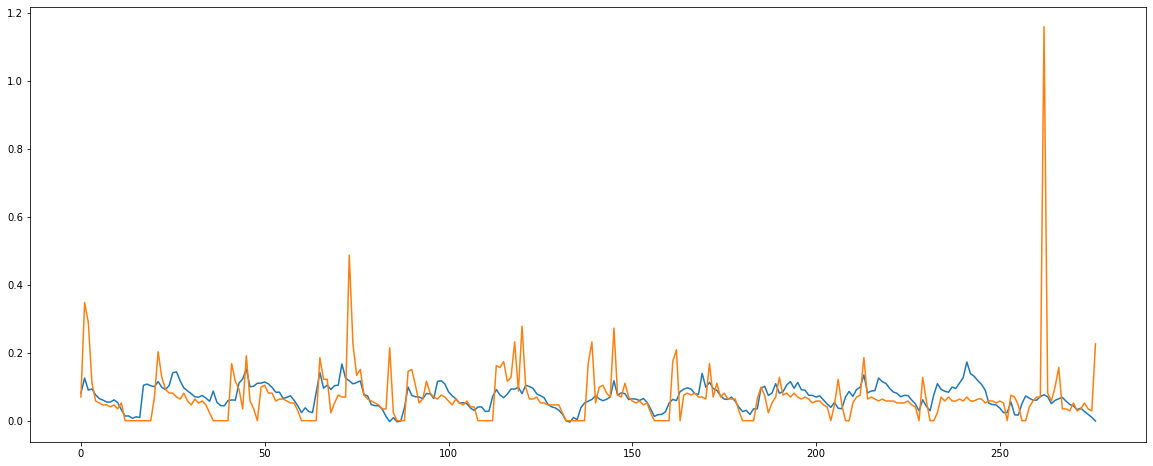

In [33]:
model.results(plot=True)